# Matriz Factorization (PCA, NMF, ICA)


En esta clase revisaremos 3 métodos de aprendizaje no supervisado que se basan en la factorización de matrices.

## PCA: Principal COmponent Analysis

Principal Component Analysis (Analisis de Componentes principales) es un método que me permite identificar una base orthonormal para un conjunto de datos analisados, de tal gorma, que el vector base asociado a la primera componente principal representa la dirección (lineal) de mayor variación de los datos, la segunda componente principal esta asociada a la segunda componente de mayor variación de los datos, y asi sucesivamente. 

PCA se puede utilizar en muchos campos:
1. Reducción de Ruido: Eliminar las componentes donde la variación de los datos es pequeña.
2. Reducción de dimensionalidad: Proyectar los datos a un espacio de menor dimensionalidad, donde los nuevos ejes de referencia son combinaciones lineales de los datos de entrada.
3. Estimación de caracteristicas o extracción de información de una señal.

### Formulación

El problema original de PCA consta de tratar de encontrar una proyección de los datos de entrada, de tal forma que se maximice la varianza de los datos proyecados. Esto se expresa de la siguiente forma:

$$\max_{\mathbf{u}}J(\mathbf{u})=\frac{1}{2N}\sum_{n=1}^N{\left(\mathbf{u}_1^{\text{T}}\mathbf{x}_n-\mathbf{u}_1^{\text{T}}\bar{\mathbf{x}_n}\right)^2},$$

Lo cual traduce a:

$$\max_{\mathbf{u}}J(\mathbf{u})= \mathbf{u}_1^{\text{T}}\mathbf{S}\mathbf{u}_1,\\
S = \frac{1}{N}\sum_{n=1}^N{\left(\mathbf{x}_n-\bar{\mathbf{x}}_n\right)\left(\mathbf{x}_n-\bar{\mathbf{x}}_n\right)^{\text{T}}},\\
\bar{\mathbf{x}}=\frac{1}{N}\sum_{n=1}^{N}\mathbf{x}_n.
$$

Donde $\mathbf{S}$ se conoce como la matrix de covarianza de los datos.

Como se desea que esos vectores $\mathbf{u}$ esten normalizados, el problema se reduce a :

$$\max_{\mathbf{u}}J(\mathbf{u}) = \mathbf{u}_1
^{\text{T}}\mathbf{S}\mathbf{u}_1, \\
\text{s.t.} \quad ||\mathbf{u}_1|| = 1.$$

Como $||\mathbf{u}|| = \mathbf{u}^{\text{T}}\mathbf{u}$, aplicando los multiplicadores de Lagrnage para solucionar este problema se tiene que el problema equivalente a solucionar es:

$$\max_{\mathbf{u}}J(\mathbf{u},\alpha) = \mathbf{u}_1^{\text{T}}\mathbf{S}\mathbf{u}_1 - \alpha_1(1-\mathbf{u}_1^{\text{T}}\mathbf{u}_1).$$

Derivando e igualando a cero se tiene:

$$ \mathbf{S}\mathbf{u}_1=\alpha_1\mathbf{u}_1.$$

El cual es un eigenvalue Problem.

Es decir, la dirección de proyección de los datos, donde la varianza de los datos es mayor, corresponde a un eigenvector de la matriz de covarianza. Ademas, el eignevalor asociado a ese vector corresponde con los coeficientes de la grange para la solución del problema.

### Desde el punto de vista de factorización de matrices.

Como vimos, PCA lo que busca es proyectar los datos sobre los eigenvectores de mayor varianza. Para poder encontrar la forma de esa proyección analisemos a PCA desde el punto de vista de factorización de matrices. Sea una matriz $\mathbf{X}\in\mathbb{R}^{N\times p}$, una matriz conteniendo todas las obeservaciones, es decir las filas de la matriz contiene los vectores $\mathbf{x}_i\in \mathbb{R}^p.$ Para coincidir con el problema expresado, trabajaremos con la matrix $\mathbf{X}^{\text{T}}$. De esta forma la matrix de covarianza esta dada por $\mathbf{S}=\mathbf{X}^{\text{T}}\mathbf{X}$. Tomando la descomposición en valores propios de la matriz de observaciones, tenemos que $\mathbf{X}=\mathbf{U}\boldsymbol\Delta\mathbf{V}^{\text{T}}$, por lo tanto es facil observar que los eigenvectores de la matrix de covarianza $\mathbf{S}$ estan dados por la matrix $\mathbf{V}$. De otra forma podemos ver que:

$$\mathbf{X}^{\text{T}} = \mathbf{V}\boldsymbol\Delta\mathbf{U}^{\text{T}},$$

la cual seria la factorización de la matrix de observación en relación con PCA. Para encontrar la matriz de proyección que esta asociada a esta transformación, reliazmos algoo de operaciones algebraicas y obtenemos:

$$\left(\mathbf{V}^{\text{T}}\mathbf{V}\right)^{-1}\mathbf{V}^{\text{T}}\mathbf{X}^{\text{T}} =\Delta\mathbf{U}^{\text{T}},$$

donde $\left(\mathbf{V}^{\text{T}}\mathbf{V}\right)^{-1}\mathbf{V}^{\text{T}}$ es una matrix de proyección, que proyecta a las observaciones $\mathbf{X}^{\text{T}}$ en el espacio de columnas de la matrix $\mathbf{V}$. Esta transformación es trivial si la matrix $\mathbf{V}$ es de rango completo, ya qu ela matriz de proyección asociada es la identidad ($\mathbf{\text{I}}$). Sin embargo, al proyectar en $q$ eigenvectores, con $q<p$, se eliminan ciertas direcciones de variación de los datos, de tal forma que  se obtiene una aproximación de menor rango de la matrix $\mathbf{X}$. Es decir:

$$\mathbf{P}_q\mathbf{X}^{\text{T}} = \mathbf{X}_q^{\text{T}},$$

donde 

$$\mathbf{P}_q=\left(\mathbf{V}_q^{\text{T}}\mathbf{V}_q\right)^{-1}\mathbf{V}_q^{\text{T}},$$

y $\mathbf{P}_q\in\mathbb{R}^{p\times p}$, y $\mathbf{X}_q\in\mathbb{R}^{N\times q}$.

### Ejemplo Práctico

En este caso veremos como se puede utilizar PCA par apoder extraer la señal de la respiración a partir de señales de electrocardiografía, y como esta descomposición permite extraer información para detectar cambios en la respiración ocasionados por apnea del sueño. El articulo anexo a este notebook plantea el problema completo. **Aplicaciones de las técnicas que hemos visto en clase se pueden usar como proyectos de tesis, un proyecto como el presentado en este paper podría facilemnte ser una proyecto de tesis.**

## NMF: Non-negative Matriz Factorization

La factorización no negativa de matrices es una tecnica de descomposicion de matrices que busca que los elementos de la descomposición no sean negativos. Esta técnica es importante para poder interpretar los resultados de la descomposición. Por ejemplo, si se tiene una matrix de datos, donde todos los elementos son positivos, y valores negativos de estos elementos no tienen sentido, al aplicar tecnicas de descomposición se debe garantizar que esa estructura de la información se preserve. Un ejemplo son las imagenes, o datos de encuentas, o sis se trabaja con la densidad espectral de potencia de señales, o con distribución de probabilidades.

### Formulación:

Se tiene una matrix de observación de datos $\mathbf{X}\in\mathbb{R}^{N\times p}$, se busca descomponer esta matriz en dos matrices de tal gorma que:

$$\mathbf{X} = \mathbf{W}\mathbf{H} +\mathbf{E},$$

donde $\mathbf{W}\in\mathbb{R}^{N\times r}$, $\mathbf{H}\in\mathbb{R}^{r\times p}$, con $r \leq \max(N,p)$, y $\mathbf{E}\in\mathbb{R}^{N\times p}$ una matriz de error. 

La idea es generar una función de costo para minimizar la magnitud del error sujeto a que todos los elementos de las matrices $\mathbf{W}$ y $\mathbf{H}$ sean positivos. Par aesto se supone qu e los elementos de las matrices siguen unas distribuciones de Poisson, por lo cual la función de costo queda expresada como:

$$J(\mathbf{W},\mathbf{H})=\sum_{i=1}^N\sum_{j=1}^p \frac{e^{-(\mathbf{W}\mathbf{H})_{ij}}(\mathbf{W}\mathbf{H})_{ij}^{x_{ij}}}{x_{ij}!},$$

donde $(\mathbf{W}\mathbf{H})_{ij}$ es el elemento $(i,j)$ del producto entre  $(\mathbf{W}\mathbf{H})$, y $x_{ij}$ es el elemento $(i,j)$ de la matriz $(\mathbf{X}$. Este problema es equivalente a resolver el problema de log-likelihood:

$$J(\mathbf{W},\mathbf{H})=\sum_{i=1}^N\sum_{j=1}^p ({x_{ij}\mathbf{W}\mathbf{H})_{ij}-(\mathbf{W}\mathbf{H})_{ij},$$

un algoritmo propuesto para la solución de este problema es inicializar de forma aleatoria las matrices $\mathbf{W}$ y $\mathbf{H}$, y actualizar lso elementos de la matrice spor medio de las siguientes formulas de actualización:

$$\displaystyle \omega_{ik}\leftarrow \omega_{ik}\frac{\frac{\sum_{j=1}^{p}h_{kj}x_{ij}}{(\mathbf{W}\mathbf{H})_{ij}}}{\sum_{j=1}^ph_{kj}},$$

$$\displaystyle h_{kj}\leftarrow h_{kj}\frac{\frac{\sum_{i=1}^{N}\omega_{ik}x_{ij}}{(\mathbf{W}\mathbf{H})_{ij}}}{\sum_{i=1}^N\omega_{ik}}.$$

Este algoritmo se ejecuta hasta que se converja a un maximo local.

### Ejemplo Práctico:

Este ejemplo fue tomado del siguiente [link](https://medium.com/logicai/non-negative-matrix-factorization-for-recommendation-systems-985ca8d5c16c). La idea es realizar un sistema de recomendación basado en NMF utilizando varias personas, una clasificación de articulos en venta, y el numero de articulos que cada persona compro. LA información esta en la siguiente tabla:

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF

X = np.array([[0,1,0,1,2,2],
              [2,3,1,1,2,2],
              [1,1,1,0,1,1],
              [0,2,3,4,1,1],
              [0,0,0,0,1,0]])

X = pd.DataFrame(V, columns=['John', 'Alice', 'Mary', 'Greg', 'Peter', 'Jennifer'])
X.index = ['Vegetables', 'Fruits', 'Sweets', 'Bread', 'Coffee']
X

,John,Alice,Mary,Greg,Peter,Jennifer
Vegetables,0,1,0,1,2,2
Fruits,2,3,1,1,2,2
Sweets,1,1,1,0,1,1
Bread,0,2,3,4,1,1
Coffee,0,0,0,0,1,0


en esta tabla nos muestran los elementos que compraron diferentes personas, la idea es a partir de estos elementos desomponer la matrix $\mathbf{X}$ en dos matrices, para este caso nos interesa agrupar a los datos en tres categorias, pro lo tanto $r=3$. Ahora realizamos la descomposición y obtenemos:

In [4]:
nmf = NMF(3)
nmf.fit(V)

H = pd.DataFrame(np.round(nmf.components_,2), columns=V.columns)
H.index = ['Fruits pickers', 'Bread eaters',  'Veggies']

W = pd.DataFrame(np.round(nmf.transform(V),2), columns=H.index)
W.index = V.index
H

,John,Alice,Mary,Greg,Peter,Jennifer
Fruits pickers,1.04,1.34,0.55,0.26,0.89,0.90
Bread eaters,0.00,0.60,1.12,1.36,0.03,0.07
Veggies,0.00,0.35,0.00,0.34,0.77,0.69


In [5]:
W

,Fruits pickers,Bread eaters,Veggies
Vegetables,0.00,0.04,2.74
Fruits,1.93,0.15,0.47
Sweets,0.97,0.00,0.00
Bread,0.00,2.66,1.18
Coffee,0.00,0.00,0.59


ahor aanalisemos los resultados. La matrix $\mathbf{W}$ nos indica la relación entre las filas de los datos originales y nuestras categorias, en este caso tenemos tres grupos y podemos ver l¡pro los valores de estos grupos que en la columna 1 se agrupan los datos de personas que escogieron frutas mayoritariamente, en la columna dos los que mayoritariamente escogieron pan, en la columna tres los qu emayoritariamente escogieron vegetales. De esta forma nombramos las preferencias de los grupos asociados (esto no signifcia que hayan escogido solo esos elementos, sino que en ese grupo esos elementos stienen una influencia más fuerte que los demas).

La matriz $\mathbf{H}$ nos indica la relación entre los diferentes clientes y las clases seleccionadas. De esta forma vemos qu eJohn, Alice, Peter y Jennifer son fruit pieckers, John y Peter son Bread eaters y que Peter y Jennnifer les gustan los Veggies. También se puede decir que a todos les gustan las frutas en cierta medida, que no todos compran pan o veggies, y que Peter es un all-rounder. 

Ahora, ¿qué más podemos hacer con esto? Si miramos la aproximación de mnuestra matriz original, s epuede observar que algunos elementos que antes eran cero ahora no lo son. Estos elementos qu eeran cero podrian tener dos significados: 
1. Que no se tomarón medidas al respecto en la compra (missing data)
2. que en efecto las personas no compraron esos elementos. 

Como NMF trata de realizar una descomposici´ñon de bajo rango de la matriz (solo seleccionamos 3 categorias), entonces al reconstruir la matrix $\mathbf{X}$ se van a rellenar las columnas con valores que sean similares al de personas que tengan un comportamiento similar en sus compras, de las cuales se tenga información. Tenga en cuenta que para realizar el proceso de optimización, los missing data se pueden representar por *NaN* y pueden ser excludios del proceso, de tal forma que al converger se llegue a obtener matrices $\mathbf{W}$ y $\mathbf{H}$, de tal forma que al realizar la estimación de $\mathbf{X}$ se pueda realizar inputación de datos (estimar lso datos faltantes) minimizando el error de predicción de los datos disponibles. Esto se conoce como *Filtro Colaborativo (sistema de Recomendación).*

Realicemos esta operación para observar que podemos conlcuir de esa aproximación:

In [6]:
reconstructed = pd.DataFrame(np.round(np.dot(W,H),2), columns=V.columns)
reconstructed.index = V.index
reconstructed

,John,Alice,Mary,Greg,Peter,Jennifer
Vegetables,0.00,0.98,0.04,0.99,2.11,1.89
Fruits,2.01,2.84,1.23,0.87,2.08,2.07
Sweets,1.01,1.30,0.53,0.25,0.86,0.87
Bread,0.00,2.01,2.98,4.02,0.99,1.00
Coffee,0.00,0.21,0.00,0.20,0.45,0.41


Basado en esta información podemos saber a que persona ofrecerle que producto, de tal forma que se ajsute a sus preferencias:

1. A Mary se le deberia ofertar productos relacionados con Pan, frutas y dulces, en ese orden de prioridad.
2. A Jhon solo le interesan las frutas y los dulces.
3. A Alice le interesan las Frutas el pan y los Dulces.
4. etc..

Por otro lado si queremos promocionar un porducto a personas que tienen interes en ese producto podemos seleccionar a quienes a traves de esta aproimación. Por ejemplo, para el cafe, en lso datos originales solo Peter compro cafe, pero en la aproximación s etiene que Peter y Jeniffer tienen valores cercanos en la compra de cafe, esto es porque el perfil de Jennifer es parecido en compras al perfil de Peter, pro esta razón Jennifer podria ser un buen target para una propaganda de mercadeo de cafe, ya que al parecerse a Peter en sus compras es probable que también le guste. Algo similar ocurre con Alice pero en menor medida.

## ICA: Independant Component Analysis

El ICA hjace parte de una familia de metodologias par ale analysis de datos pro componentes (PCA, CCA, ICA). PCA descompone los datos a partir de una base donde los vectores base son ortogonales. La idea detras de ICA es desconponerla en un abase donde los vectores son independientes, tratando independencia desde un punto de vista estadistico. ICA parte de la idea de que las observaciones obtenidas son una combinación lineal de un conjunto de fuentes. el probelma más común en ICA se denomina Blind-Source separation o el Cocktail-Party Problem.

<img src="img/CP_problem.png" width="300">

### Formulación:

Sea la matrix de observacion $\mathbf{X}\in\mathbb{R}^{N\times p}$, se tiene que cada observación es una combinación lineal de unas fuentes $\mathbf{S}\in\mathbb{R}^{N\times p}$, dada por una matrix de combinación $\mathbf{A}\in\mathbb{R}^{p\times p}$. De tal forma que:

$$\mathbf{X}^{\text{T}}=\mathbf{A}\mathbf{S}^{\text{T}},$$

como noconocemos ni a $\mathbf{A}$ ni a $\mathbf{S}$, la idea es hacer suposiciones sobre ellas, lo que podemos suponer es que las fuentes (columnas de $\mathbf{S}$) son independientes estadisticamente hablando y que $\mathbf{A}$ es full-rank, es decir que es invertible. De esta forma podemos decir que:

$$\mathbf{W}\mathbf{X}^{\text{T}}=\mathbf{S}^{\text{T}},$$

es una estimación de las fuentes que generan los datos $\mathbf{X}$, por lo tanto el problema es encontrar una matrix $\mathbf{W}=\mathbf{W}^{-1}$ tal que las columnas de $\mathbf{S}$ sean independeintes. Para esto tenemos que plantear nuestra función de costo de tal forma que esto se cumpla.

1. Asumir que nuestras fuentes no estas distribuidas de forma gaussiana. Esta distribución es invariante a la rotación, por lo tanto no es posible encontrar una solución. (Explicar con el caso de variables uniformes y la generación de un rombo)
2. Vamos a trabajar con CDF (Cummulative distributive functions). En general se utiliza la función logistica como un candidato para las CDF de las fuentes.
3. **Clave de ICA**: Como las fuentes osn independientes, entonces la estimacion de la distribución cumulativa de las fuentes esta dada por:
$$p(S)=\prod_{i=1}^p p_s(s_i),$$

    donde p_s(s_i) es la CDF de la fuente $s_i$.
4. La densidad de los datos estaria dada por:

$$p(\mathbf{X})=p_s(\mathbf{W}\mathbf{X})|\mathbf{W}|,$$
    donde $p_s$ tiene la forma logistica, y $|\mathbf{W}|$ es el determinante de $\mathbf{W}$, se utiliza para normalizar la distribución.
5. Por lo tanto la distribución de mis datos se debe ajustar a:

$$p(\mathbf{X})=\prod_{i=1}^pp_j(\boldsymbol\omega_j^{\text{T}}\mathbf{X})|\mathbf{W}|,$$

donde $\boldsymbol\omega_j^{\text{T}}$, es la fila $j$ de la matriz $\mathbf{W}$.

6. Ahora planteamos la función de costo utilizando el maximum likelihood estimator (MLE):

$$L(\mathbf{W}) = \sum_{i=1}^N\log\left(\prod_{i=1}^pp_j(\boldsymbol\omega_j^{\text{T}}\mathbf{X})|\mathbf{W}|\right),$$

    el cual al utilizar Stochastic Gradient Descent (SGD) o un gradiente descendiente básico, se obtiene:

$$\begin{equation}
\nabla_{\boldsymbol\omega}L(\mathbf{W})= 
    \begin{bmatrix}
        1-2g(\boldsymbol\omega_1^{\text{T}})\\
        1-2g(\boldsymbol\omega_2^{\text{T}})\\
        \vdots \\
        1-2g(\boldsymbol\omega_N^{\text{T}})
    \end{bmatrix}
 \mathbf{X}^{\text{T}}+(\mathbf{W}^{\text{T}})^{-1}
\end{equation}$$


De est amanera la idea es inicializar de forma aleatoria $\mathbf{W}$, y actualizar los pesos de esta utilizando:

$$\mathbf{W}=\mathbf{W}-\eta\nabla_{\boldsymbol\omega}L(\mathbf{W}).$$

Este es el algortimo básico de ICA, hay otros que lo que hacen es determinar independencia minimizando la información mutua entre las fuentes, o la entropia cruzada, etc....

### Ejercicio práctico

En la práctica hay ciertas consideraciones a tener en cuenta:

1. Los datos deben estar centrados.
2. Los datos deben ser *prewhithened*, es decir las direcciones de variación de los datos debe ser la misma. (multiplicar la matrix de valores propios por su inversa y reconstruir), eliminar las covarianzas entre las columnas.

El ejemplo que ejecutaremos lo obtuvimos de [aquí](https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)

Automatically created module for IPython interactive environment


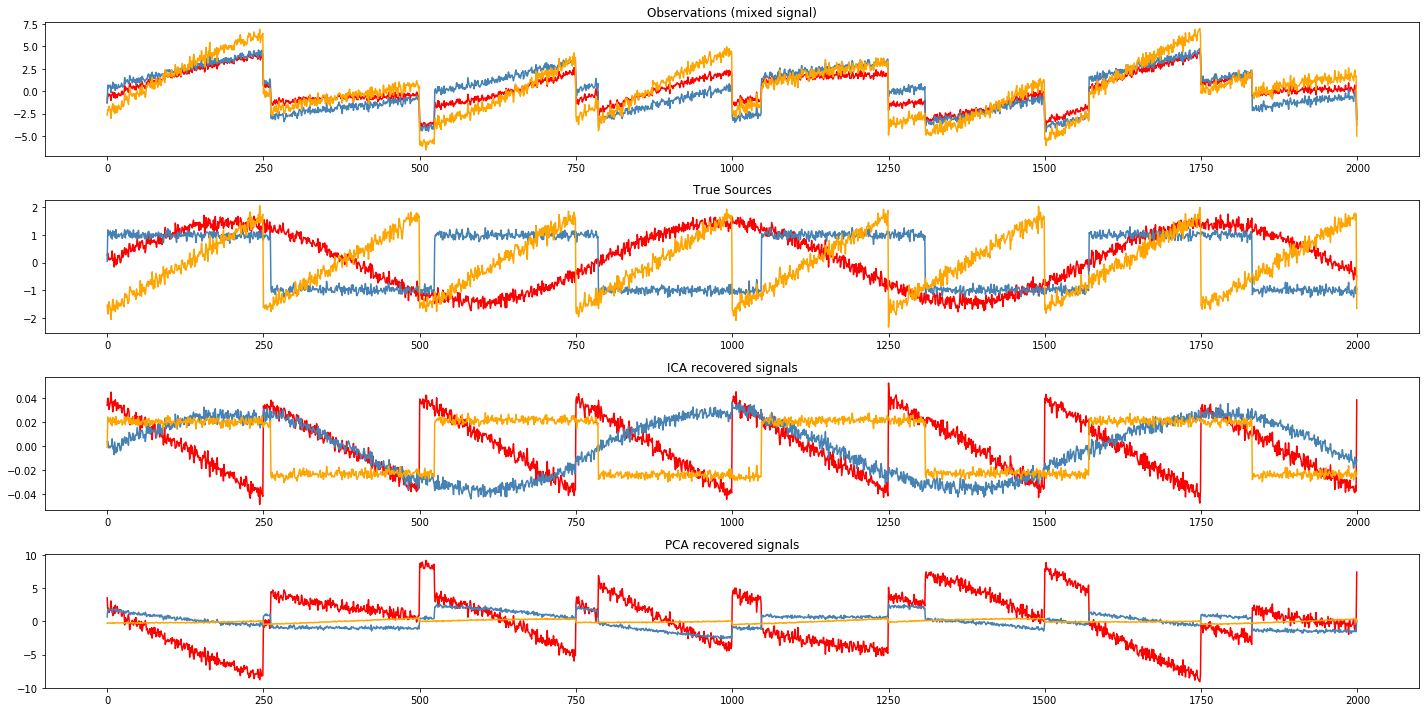

In [26]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.1 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure(figsize=(20,10))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

#### Ejemplo 2: Separación de señales de voz

Este ejemplo fue tomado de [aquí](https://towardsdatascience.com/independent-component-analysis-ica-in-python-a0ef0db0955e)

In [29]:
def mix_sources(mixtures, apply_noise=False):
    for i in range(len(mixtures)):
        
        max_val = np.max(mixtures[i])
        
        if max_val > 1 or np.min(mixtures[i]) < 1:
            
            mixtures[i] = mixtures[i] / (max_val / 2) - 0.5
            
    X = np.c_[[mix for mix in mixtures]]
    
    if apply_noise:
        
        X += 0.02 * np.random.normal(size=X.shape)
        
    return X

def plot_mixture_sources_predictions(X, original_sources, S):
    fig = plt.figure(figsize=(20,10))
    plt.subplot(3, 1, 1)
    for x in X:
        plt.plot(x)
    plt.title("mixtures")
    plt.subplot(3, 1, 2)
    for s in original_sources:
        plt.plot(s)
    plt.title("real sources")
    plt.subplot(3,1,3)
    for s in S:
        plt.plot(s)
    plt.title("predicted sources")
    
    fig.tight_layout()
    plt.show()

In [ ]:
from scipy.io import wavfile

sampling_rate, mix1 = wavfile.read('mix1.wav')
sampling_rate, mix2 = wavfile.read('mix2.wav')
sampling_rate, source1 = wavfile.read('source1.wav')
sampling_rate, source2 = wavfile.read('source2.wav')
X = mix_sources([mix1, mix2])

ica = FastICA(n_components=2)
S = ica.fit_transform(X.T)

plot_mixture_sources_predictions(X, [source1, source2], S)

In [24]:
len(X.T)

50000